In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import processing_netcdf as pcdf
import geopandas as gpd
from geopandas import GeoDataFrame
import shapely.geometry 
import numpy as np
from shapely import geometry as gmty
from geofeather import to_geofeather, from_geofeather
import glob
import os
import pyarrow
from xclim import ensembles as ens
from xclim import subset
import matplotlib.pyplot as plt

In [2]:
folder = "/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/"

# Select and open Region (Shapefile)

In [76]:
######Select Region by uncommenting
#region = 'DDE_STF_20K_REG_FOR_VUE_S'
# region = 'DDE_STF_20K_UA_PER_VUE_S'
#region = 'DOM_BIO'
region = 'REG_ECO'
#region = 'SDOM_BIO'
#region = 'Secteurs_Operations_Regionales'
#region = 'SREG_ECO'
# region = 'territoire_guide

In [114]:
shapefile = ("/home/mlopez/EXEC/Shapefiles/"+region+".shp")
poly0 = gpd.read_file(shapefile)
poly = poly0[poly0.geometry.type == 'Polygon'].to_crs('epsg:4326')
poly.head()

,OBJECTID,ZONE_VEG,SZONE_VEG,DOM_BIO,SDOM_BIO,REG_ECO,NOM,SUPERFICIE,Shape_Leng,Shape_Area,geometry
0,1,Z1,Z11,2,2O,2a,Collines de la basse Gatineau,565715.3,8.414719,0.655231,"POLYGON ((-75.96496 46.66337, -75.96441 46.662..."
1,2,Z1,Z11,3,3O,3a,Collines de l'Outaouais et du Témiscamingue,1876175.7,13.600460,2.203906,"POLYGON ((-78.73881 47.36322, -78.73770 47.362..."
2,3,Z1,Z12,4,4O,4a,Plaines et coteaux du lac Simard,586441.8,5.751082,0.707355,"POLYGON ((-79.12205 48.18515, -79.12199 48.185..."
3,4,Z2,Z21,5,5O,5a,Plaine de l'Abitibi,2655527.8,16.490041,3.259451,"POLYGON ((-78.29456 49.46377, -78.29440 49.463..."
4,5,Z2,Z21,6,6O,6a,Plaine du lac Matagami,4827294.7,22.687201,6.130798,"POLYGON ((-77.20729 51.29535, -77.20492 51.295..."


## Import dataframe with polygons

In [79]:
dfpolyshape = from_geofeather('/home/mlopez/EXEC/Grids-polygons-regions/Grid-'+region+'.feather')
#dfpolyshape = from_geofeather('/home/mlopez/EXEC/Grids-polygons-regions/Grid-.feather')

In [115]:
dfpolyshape.head()

,lat,lon,OBJECTID,ZONE_VEG,SZONE_VEG,DOM_BIO,SDOM_BIO,REG_ECO,NOM,SUPERFICIE,Shape_Leng,Shape_Area,geometry
0,52.540539,-69.212669,32,Z2,Z21,6,6E,6q,Coteaux des lacs Matonipi et Jonquet,990365.0,13.606366,1.314613,"POLYGON ((-69.17101 52.52598, -69.17101 52.498..."
1,52.540539,-69.129341,32,Z2,Z21,6,6E,6q,Coteaux des lacs Matonipi et Jonquet,990365.0,13.606366,1.314613,"POLYGON ((-69.17101 52.49887, -69.17101 52.525..."
2,52.540539,-69.046013,32,Z2,Z21,6,6E,6q,Coteaux des lacs Matonipi et Jonquet,990365.0,13.606366,1.314613,"POLYGON ((-69.08768 52.49887, -69.08768 52.562..."
3,52.457211,-69.295998,32,Z2,Z21,6,6E,6q,Coteaux des lacs Matonipi et Jonquet,990365.0,13.606366,1.314613,"POLYGON ((-69.25433 52.42950, -69.25433 52.415..."
4,52.457211,-69.212669,32,Z2,Z21,6,6E,6q,Coteaux des lacs Matonipi et Jonquet,990365.0,13.606366,1.314613,"POLYGON ((-69.25433 52.41554, -69.25433 52.429..."


# Select variable

In [117]:
#Variable 
variable85="rcp85_tg_mean_annual"
variable45="rcp85_tg_mean_annual"
#variable="rcp[48]5_tg_mean_annual"

files85 = glob.glob(folder+"*"+variable85+".nc")
files45 = glob.glob(folder+"*"+variable45+".nc")
#ex: ACCESS1-3_rcp45_tn_mean_annual.nc
files85
files45

['/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/ACCESS1-3_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/BNU-ESM_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/CanESM2_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/CMCC-CMS_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/GFDL-ESM2M_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/HadGEM2-CC_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/INM-CM4_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/IPSL-CM5A-LR_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/IPSL-CM5B-LR_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/MPI-ESM-LR_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/NorESM1-M_rcp85_tg_mean_annual.nc']

# FOR RCP 45

## Open Mask if already created or create it. 

In [81]:
dsEns45= ens.create_ensemble(files45)
#dsEnsSeas = ens.create_ensemble(filesSeas)
dsEns45
if os.path.exists(shapefile.replace('.shp','.nc')):
    mask = xr.open_dataset(shapefile.replace('.shp','.nc'))
    mask = mask.__xarray_dataarray_variable__
    
else:
    mask= subset.create_mask(poly=poly, x_dim=dsEns45.lon, y_dim=dsEns45.lat)
    mask = mask.T
    mask.to_netcdf(shapefile.replace('.shp','.nc'))

  warn(



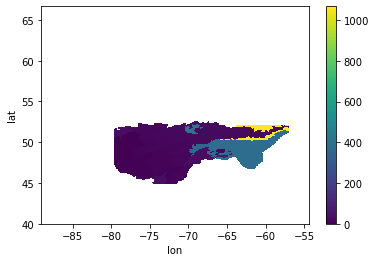

In [82]:
mask.plot()

## Subsetting arrays with Xclim

In [84]:
# Mapping data - 30 year means
tmp1 = dsEns45.sel(time=(dsEns45.time.dt.year>=1981))
window = 30
time1 = tmp1.time[0::window]

ds30yavg = tmp1.coarsen(time=window).mean()
ds30yavg['time'] = time1
perc30yavg = ens.ensemble_percentiles(ds30yavg)
perc30yavg # entire grid

# Mapping data

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 320, 416), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 320, 416), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 320, 416), meta=np.ndarray>

In [85]:
# select data for individual regions and create Dataframe
reg_ids = np.unique(mask.values)
reg_ids = reg_ids[np.where(~np.isnan(reg_ids))]
listRegions = []
for r in reg_ids:
    print(r)
    if ~np.isnan(r):
        reg = perc30yavg.where(mask==r, drop=True)
        print(reg)
        df = reg.drop('realization').to_dataframe().dropna()
        listRegions.append(df)
        # export ot netcdf?

0.0
<xarray.Dataset>
Dimensions:      (lat: 15, lon: 25, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -76.46238 -76.37905 ... -74.54579 -74.46246
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 46.62411 46.54078 46.45745 ... 45.54082 45.45749
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 15, 25), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 15, 25), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 15, 25), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



1.0
<xarray.Dataset>
Dimensions:      (lat: 19, lon: 40, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -79.37893 -79.2956 ... -76.21239 -76.12906
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 47.29075 47.20742 47.12409 ... 45.87414 45.79081
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 40), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 40), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 40), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



2.0
<xarray.Dataset>
Dimensions:      (lat: 12, lon: 15, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -79.54559 -79.46226 ... -78.4623 -78.37897
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 48.12405 48.04072 47.95739 ... 47.29075 47.20742
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 12, 15), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 12, 15), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 12, 15), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



3.0
<xarray.Dataset>
Dimensions:      (lat: 22, lon: 35, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -79.46226 -79.37893 ... -76.71237 -76.62904
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 49.45733 49.374 49.29067 ... 47.79073 47.7074
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 22, 35), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 22, 35), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 22, 35), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



4.0
<xarray.Dataset>
Dimensions:      (lat: 29, lon: 47, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -79.46226 -79.37893 ... -75.71241 -75.62908
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 51.29059 51.20726 51.12393 ... 49.04068 48.95735
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 29, 47), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 29, 47), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 29, 47), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



5.0
<xarray.Dataset>
Dimensions:      (lat: 26, lon: 48, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -73.79582 -73.71249 ... -69.96264 -69.87931
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 47.54074 47.45741 47.37408 ... 45.54082 45.45749
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 26, 48), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 26, 48), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 26, 48), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



6.0
<xarray.Dataset>
Dimensions:      (lat: 15, lon: 25, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -76.46238 -76.37905 ... -74.54579 -74.46246
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 46.95743 46.8741 46.79077 ... 45.87414 45.79081
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 15, 25), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 15, 25), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 15, 25), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



7.0
<xarray.Dataset>
Dimensions:      (lat: 17, lon: 54, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -78.96228 -78.87895 ... -74.62912 -74.54579
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 48.04072 47.95739 47.87406 ... 46.79077 46.70744
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 17, 54), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 17, 54), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 17, 54), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



8.0
<xarray.Dataset>
Dimensions:      (lat: 15, lon: 32, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -77.04569 -76.96236 ... -74.54579 -74.46246
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 48.79069 48.70736 48.62403 ... 47.7074 47.62407
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 15, 32), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 15, 32), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 15, 32), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



9.0
<xarray.Dataset>
Dimensions:      (lat: 12, lon: 19, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -72.87919 -72.79586 ... -71.46258 -71.37925
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 45.95747 45.87414 45.79081 ... 45.12417 45.04084
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 12, 19), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 12, 19), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 12, 19), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



10.0
<xarray.Dataset>
Dimensions:      (lat: 23, lon: 35, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -74.79578 -74.71245 ... -72.04589 -71.96256
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 47.54074 47.45741 47.37408 ... 45.79081 45.70748
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 23, 35), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 23, 35), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 23, 35), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



11.0
<xarray.Dataset>
Dimensions:      (lat: 19, lon: 49, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -75.79574 -75.71241 ... -71.87923 -71.7959
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 48.20738 48.12405 48.04072 ... 46.79077 46.70744
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 49), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 49), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 49), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



12.0
<xarray.Dataset>
Dimensions:      (lat: 21, lon: 48, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -75.37909 -75.29576 ... -71.54591 -71.46258
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 49.04068 48.95735 48.87402 ... 47.45741 47.37408
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 21, 48), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 21, 48), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 21, 48), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



13.0
<xarray.Dataset>
Dimensions:      (lat: 23, lon: 38, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -76.96236 -76.87903 ... -73.96248 -73.87915
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 50.45729 50.37396 50.29063 ... 48.70736 48.62403
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 23, 38), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 23, 38), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 23, 38), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



14.0
<xarray.Dataset>
Dimensions:      (lat: 28, lon: 27, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -71.87923 -71.7959 ... -69.79598 -69.71265
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 47.29075 47.20742 47.12409 ... 45.12417 45.04084
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 28, 27), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 28, 27), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 28, 27), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



15.0
<xarray.Dataset>
Dimensions:      (lat: 22, lon: 30, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -71.7959 -71.71257 ... -69.46266 -69.37933
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 48.62403 48.5407 48.45737 ... 46.95743 46.8741
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 22, 30), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 22, 30), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 22, 30), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



16.0
<xarray.Dataset>
Dimensions:      (lat: 24, lon: 37, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -73.29584 -73.21251 ... -70.37929 -70.29596
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 50.04064 49.95731 49.87398 ... 48.20738 48.12405
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 24, 37), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 24, 37), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 24, 37), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



17.0
<xarray.Dataset>
Dimensions:      (lat: 26, lon: 59, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -77.54567 -77.46234 ... -72.79586 -72.71253
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 52.20722 52.12389 52.04056 ... 50.2073 50.12397
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 26, 59), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 26, 59), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 26, 59), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



18.0
<xarray.Dataset>
Dimensions:      (lat: 11, lon: 24, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -72.71253 -72.6292 ... -70.87927 -70.79594
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 49.12401 49.04068 48.95735 ... 48.37404 48.29071
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 11, 24), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 11, 24), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 11, 24), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



19.0
<xarray.Dataset>
Dimensions:      (lat: 14, lon: 25, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -72.04589 -71.96256 ... -70.1293 -70.04597
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 48.20738 48.12405 48.04072 ... 47.20742 47.12409
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 14, 25), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 14, 25), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 14, 25), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



20.0
<xarray.Dataset>
Dimensions:      (lat: 26, lon: 41, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -75.37909 -75.29576 ... -72.12922 -72.04589
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 50.79061 50.70728 50.62395 ... 48.79069 48.70736
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 26, 41), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 26, 41), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 26, 41), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



21.0
<xarray.Dataset>
Dimensions:      (lat: 8, lon: 20, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -71.12926 -71.04593 ... -69.62932 -69.54599
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 48.95735 48.87402 48.79069 ... 48.45737 48.37404
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 8, 20), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 8, 20), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 8, 20), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



22.0
<xarray.Dataset>
Dimensions:      (lat: 22, lon: 29, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -74.54579 -74.46246 ... -72.29588 -72.21255
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 51.62391 51.54058 51.45725 ... 49.95731 49.87398
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 22, 29), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 22, 29), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 22, 29), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



23.0
<xarray.Dataset>
Dimensions:      (lat: 20, lon: 37, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -73.04585 -72.96252 ... -70.1293 -70.04597
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 51.79057 51.70724 51.62391 ... 50.29063 50.2073
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 20, 37), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 20, 37), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 20, 37), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



24.0
<xarray.Dataset>
Dimensions:      (lat: 24, lon: 41, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -72.71253 -72.6292 ... -69.46266 -69.37933
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 50.70728 50.62395 50.54062 ... 48.87402 48.79069
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 24, 41), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 24, 41), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 24, 41), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



25.0
<xarray.Dataset>
Dimensions:      (lat: 10, lon: 24, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -67.12942 -67.04609 ... -65.29616 -65.21283
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 49.12401 49.04068 48.95735 ... 48.45737 48.37404
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 10, 24), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 10, 24), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 10, 24), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



26.0
<xarray.Dataset>
Dimensions:      (lat: 27, lon: 42, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -71.04593 -70.9626 ... -67.71273 -67.6294
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 51.70724 51.62391 51.54058 ... 49.62399 49.54066
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 27, 42), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 27, 42), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 27, 42), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



27.0
<xarray.Dataset>
Dimensions:      (lat: 23, lon: 70, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -68.04605 -67.96272 ... -62.37961 -62.29628
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 51.54058 51.45725 51.37392 ... 49.79065 49.70732
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 23, 70), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 23, 70), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 23, 70), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



28.0
<xarray.Dataset>
Dimensions:      (lat: 13, lon: 34, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -69.12934 -69.04601 ... -66.46278 -66.37945
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 51.70724 51.62391 51.54058 ... 50.79061 50.70728
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 13, 34), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 13, 34), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 13, 34), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



29.0
<xarray.Dataset>
Dimensions:      (lat: 19, lon: 67, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -62.6296 -62.54627 ... -57.21315 -57.12982
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 51.95723 51.8739 51.79057 ... 50.54062 50.45729
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 67), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 67), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 67), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



30.0
<xarray.Dataset>
Dimensions:      (lat: 18, lon: 80, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -68.4627 -68.37937 ... -61.96296 -61.87963
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 52.45721 52.37388 52.29055 ... 51.12393 51.0406
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 18, 80), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 18, 80), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 18, 80), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



31.0
<xarray.Dataset>
Dimensions:      (lat: 13, lon: 43, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -71.96256 -71.87923 ... -68.54603 -68.4627
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 52.54054 52.45721 52.37388 ... 51.62391 51.54058
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 13, 43), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 13, 43), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 13, 43), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



32.0
<xarray.Dataset>
Dimensions:      (lat: 6, lon: 16, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -68.21271 -68.12938 ... -67.04609 -66.96276
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 51.79057 51.70724 51.62391 ... 51.45725 51.37392
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 6, 16), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 6, 16), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 6, 16), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



33.0
<xarray.Dataset>
Dimensions:      (lat: 7, lon: 22, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -77.21235 -77.12902 ... -75.1291 -75.04577
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 45.95747 45.87414 45.79081 ... 45.54082 45.45749
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 7, 22), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 7, 22), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 7, 22), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



34.0
<xarray.Dataset>
Dimensions:      (lat: 16, lon: 23, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -74.54579 -74.46246 ... -72.79586 -72.71253
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 46.29079 46.20746 46.12413 ... 45.12417 45.04084
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 16, 23), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 16, 23), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 16, 23), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



36.0
<xarray.Dataset>
Dimensions:      (lat: 4, lon: 13, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -77.21235 -77.12902 ... -76.29572 -76.21239
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 51.8739 51.79057 51.70724 51.62391
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 4, 13), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 4, 13), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 4, 13), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



37.0
<xarray.Dataset>
Dimensions:      (lat: 19, lon: 33, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -79.46226 -79.37893 ... -76.7957 -76.71237
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 51.8739 51.79057 51.70724 ... 50.45729 50.37396
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 33), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 33), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 33), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



38.0
<xarray.Dataset>
Dimensions:      (lat: 28, lon: 46, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -70.71261 -70.62928 ... -67.04609 -66.96276
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 49.29067 49.20734 49.12401 ... 47.12409 47.04076
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 28, 46), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 28, 46), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 28, 46), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



71.0
<xarray.Dataset>
Dimensions:      (lat: 9, lon: 37, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -67.37941 -67.29608 ... -64.46286 -64.37953
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 48.5407 48.45737 48.37404 ... 47.95739 47.87406
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 9, 37), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 9, 37), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 9, 37), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



78.0
<xarray.Dataset>
Dimensions:      (lat: 3, lon: 8, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -64.79618 -64.71285 ... -64.2962 -64.21287
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 48.79069 48.70736 48.62403
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 3, 8), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 3, 8), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 3, 8), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



348.0
<xarray.Dataset>
Dimensions:      (lat: 24, lon: 48, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -69.79598 -69.71265 ... -65.9628 -65.87947
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 50.29063 50.2073 50.12397 ... 48.37404 48.29071
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 24, 48), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 24, 48), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 24, 48), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



351.0
<xarray.Dataset>
Dimensions:      (lat: 1, lon: 3, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -64.79618 -64.71285 -64.62952
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 48.87402
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 1, 3), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 1, 3), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 1, 3), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



367.0
<xarray.Dataset>
Dimensions:      (lat: 9, lon: 40, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -67.46274 -67.37941 ... -64.2962 -64.21287
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 49.20734 49.12401 49.04068 ... 48.62403 48.5407
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 9, 40), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 9, 40), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 9, 40), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



373.0
<xarray.Dataset>
Dimensions:      (lat: 13, lon: 36, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -67.21275 -67.12942 ... -64.37953 -64.2962
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 49.12401 49.04068 48.95735 ... 48.20738 48.12405
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 13, 36), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 13, 36), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 13, 36), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



374.0
<xarray.Dataset>
Dimensions:      (lat: 10, lon: 34, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -64.46286 -64.37953 ... -61.7963 -61.71297
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 49.87398 49.79065 49.70732 ... 49.20734 49.12401
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 10, 34), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 10, 34), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 10, 34), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



375.0
<xarray.Dataset>
Dimensions:      (lat: 2, lon: 15, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -64.21287 -64.12954 ... -63.12958 -63.04625
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 50.29063 50.2073
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 2, 15), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 2, 15), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 2, 15), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



376.0
<xarray.Dataset>
Dimensions:      (lat: 55, lon: 123, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -67.29608 -67.21275 ... -57.21315 -57.12982
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 51.37392 51.29059 51.20726 ... 46.95743 46.8741
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 55, 123), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 55, 123), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 55, 123), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



407.0
<xarray.Dataset>
Dimensions:      (lat: 4, lon: 4, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -61.96296 -61.87963 -61.7963 -61.46298
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 47.62407 47.45741 47.37408 47.29075
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 4, 4), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 4, 4), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 4, 4), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



413.0
<xarray.Dataset>
Dimensions:      (lat: 3, lon: 4, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -68.4627 -68.37937 -68.29604 -68.21271
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 51.79057 51.70724 51.62391
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 3, 4), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 3, 4), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 3, 4), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



414.0
<xarray.Dataset>
Dimensions:      (lat: 15, lon: 25, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -70.54595 -70.46262 ... -68.62936 -68.54603
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 52.12389 52.04056 51.95723 ... 51.0406 50.95727
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 15, 25), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 15, 25), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 15, 25), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



1066.0
<xarray.Dataset>
Dimensions:      (lat: 20, lon: 99, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -65.79614 -65.71281 ... -57.21315 -57.12982
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 51.70724 51.62391 51.54058 ... 50.2073 50.12397
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 20, 99), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 20, 99), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 20, 99), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



1068.0
<xarray.Dataset>
Dimensions:      (lat: 10, lon: 78, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -63.71289 -63.62956 ... -57.21315 -57.12982
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 51.95723 51.8739 51.79057 ... 51.29059 51.20726
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 10, 78), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 10, 78), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 10, 78), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



# TODO: 
- Make a for loop or/and function for this section - This needs to be done by region

In [ ]:
for region in listRegions:
    i = 0
    print region[i]
    Region1 = listRegions[i]
    print("sub region created")
    Region1i = Region1.reset_index()
    Region1i2 = Region1i[Region1i.time.dt.year!= 2011]
    print ("2011 eliminated")
    Regionli3 = Region1i2.pivot_table(index=["lat","lon"], columns="time")
    print ("DF pivoted")
    Regionli3.columns = [year + "_tg_mean_p"+p
                     for p in ["10", "50", "90"]
                     for year in ["hist","2050", "2080"]]
    print("Columns renamed")

## Example for Region 1

In [86]:
Region1 = listRegions[1]
Region1i = Region1.reset_index()

In [87]:
Region1i

,lat,lon,time,tg_mean_p10,tg_mean_p50,tg_mean_p90
0,47.290749,-79.128937,1981-01-01,276.057526,276.170746,276.380310
1,47.290749,-79.128937,2011-01-01,277.192291,277.488800,278.046021
2,47.290749,-79.128937,2041-01-01,278.780273,279.441681,280.218597
3,47.290749,-79.128937,2071-01-01,280.180206,281.993591,283.239380
4,47.290749,-79.045609,1981-01-01,276.019531,276.134583,276.345978
...,...,...,...,...,...,...
1267,45.790810,-76.545708,2071-01-01,282.010803,283.748688,285.039917
1268,45.790810,-76.379051,1981-01-01,277.974396,278.091766,278.215515
1269,45.790810,-76.379051,2011-01-01,279.009430,279.411285,279.911804
1270,45.790810,-76.379051,2041-01-01,280.706055,281.262817,282.003815


In [99]:
Region1i2 = Region1i[Region1i.time.dt.year!= 2011]
Region1i2

,lat,lon,time,tg_mean_p10,tg_mean_p50,tg_mean_p90
0,47.290749,-79.128937,1981-01-01,276.057526,276.170746,276.380310
2,47.290749,-79.128937,2041-01-01,278.780273,279.441681,280.218597
3,47.290749,-79.128937,2071-01-01,280.180206,281.993591,283.239380
4,47.290749,-79.045609,1981-01-01,276.019531,276.134583,276.345978
6,47.290749,-79.045609,2041-01-01,278.744690,279.404236,280.182404
...,...,...,...,...,...,...
1266,45.790810,-76.545708,2041-01-01,280.729645,281.292389,282.033691
1267,45.790810,-76.545708,2071-01-01,282.010803,283.748688,285.039917
1268,45.790810,-76.379051,1981-01-01,277.974396,278.091766,278.215515
1270,45.790810,-76.379051,2041-01-01,280.706055,281.262817,282.003815


In [107]:
Regionli3 = Region1i2.pivot_table(index=["lat","lon"], columns="time")



In [108]:
Regionli3

tg_mean_p10                         tg_mean_p50  \
time                  1981-01-01  2041-01-01  2071-01-01  1981-01-01   
lat       lon                                                          
45.790810 -76.545708  277.999542  280.729645  282.010803  278.116730   
          -76.379051  277.974396  280.706055  281.980347  278.091766   
45.874142 -76.629044  277.839264  280.579590  281.866150  277.959961   
          -76.545708  277.725464  280.466766  281.748871  277.845703   
          -76.462379  277.765991  280.508728  281.789185  277.886719   
...                          ...         ...         ...         ...   
47.290749 -79.128937  276.057526  278.780273  280.180206  276.170746   
          -79.045609  276.019531  278.744690  280.142426  276.134583   
          -78.962280  275.973419  278.700958  280.096558  276.089783   
          -78.878952  275.861664  278.590027  279.983459  275.978882   
          -78.795624  275.839325  278.569946  279.959778  275.958221   

                                             tg_mean_p90              \
time                  2041-01-01  2071-01-01  1981-01-01  2041-01-01   
lat       lon                                                          
45.790810 -76.545708  281.292389  283.748688  278.238464  282.033691   
          -76.379051  281.262817  283.723572  278.215515  282.003815   
45.874142 -76.629044  281.138397  283.609100  278.083801  281.882172   
          -76.545708  281.021576  283.495056  277.971649  281.764801   
          -76.462379  281.061157  283.537048  278.014191  281.804810   
...                          ...         ...         ...         ...   
47.290749 -79.128937  279.441681  281.993591  276.380310  280.218597   
          -79.045609  279.404236  281.961090  276.345978  280.182404   
          -78.962280  279.357941  281.919312  276.303680  280.137268   
          -78.878952  279.244568  281.809601  276.194641  280.024323   
          -78.795624  279.220184  281.790710  276.174133  280.001251   

                                  
time                  2071-01-01  
lat       lon                     
45.790810 -76.545708  285.039917  
          -76.379051  285.012268  
45.874142 -76.629044  284.887604  
          -76.545708  284.771820  
          -76.462379  284.813263  
...                          ...  
47.290749 -79.128937  283.239380  
          -79.045609  283.204224  
          -78.962280  283.159729  
          -78.878952  283.047668  
          -78.795624  283.026215  

[318 rows x 9 columns]

In [113]:
Regionli3.columns = [year + "_tg_mean_p"+p
                     for p in ["10", "50", "90"]
                     for year in ["hist","2050", "2080"]]#"hist_tg_mean_p10", "2050_tg_mean_p10","2080_tg_mean_p10","hist_tg_mean_p50","tg_mean_p50","tg_mean_p90","tg_mean_p10","tg_mean_p50","tg_mean_p90",]

Regionli3

hist_tg_mean_p10  2050_tg_mean_p10  2080_tg_mean_p10  \
lat       lon                                                                
45.790810 -76.545708        277.999542        280.729645        282.010803   
          -76.379051        277.974396        280.706055        281.980347   
45.874142 -76.629044        277.839264        280.579590        281.866150   
          -76.545708        277.725464        280.466766        281.748871   
          -76.462379        277.765991        280.508728        281.789185   
...                                ...               ...               ...   
47.290749 -79.128937        276.057526        278.780273        280.180206   
          -79.045609        276.019531        278.744690        280.142426   
          -78.962280        275.973419        278.700958        280.096558   
          -78.878952        275.861664        278.590027        279.983459   
          -78.795624        275.839325        278.569946        279.959778   

                      hist_tg_mean_p50  2050_tg_mean_p50  2080_tg_mean_p50  \
lat       lon                                                                
45.790810 -76.545708        278.116730        281.292389        283.748688   
          -76.379051        278.091766        281.262817        283.723572   
45.874142 -76.629044        277.959961        281.138397        283.609100   
          -76.545708        277.845703        281.021576        283.495056   
          -76.462379        277.886719        281.061157        283.537048   
...                                ...               ...               ...   
47.290749 -79.128937        276.170746        279.441681        281.993591   
          -79.045609        276.134583        279.404236        281.961090   
          -78.962280        276.089783        279.357941        281.919312   
          -78.878952        275.978882        279.244568        281.809601   
          -78.795624        275.958221        279.220184        281.790710   

                      hist_tg_mean_p90  2050_tg_mean_p90  2080_tg_mean_p90  
lat       lon                                                               
45.790810 -76.545708        278.238464        282.033691        285.039917  
          -76.379051        278.215515        282.003815        285.012268  
45.874142 -76.629044        278.083801        281.882172        284.887604  
          -76.545708        277.971649        281.764801        284.771820  
          -76.462379        278.014191        281.804810        284.813263  
...                                ...               ...               ...  
47.290749 -79.128937        276.380310        280.218597        283.239380  
          -79.045609        276.345978        280.182404        283.204224  
          -78.962280        276.303680        280.137268        283.159729  
          -78.878952        276.194641        280.024323        283.047668  
          -78.795624        276.174133        280.001251        283.026215  

[318 rows x 9 columns]

# TODO:
- Same process for the another scenario
- Get separate Dataframe for historic p50, put together both scenarios, get the mean by sum/2

## Merge data with polygons mask

In [118]:
Region1poly = pd.merge(Regionli3, dfpolyshape, on=["lat","lon"])


In [119]:
Region1poly.head()

,lat,lon,hist_tg_mean_p10,2050_tg_mean_p10,2080_tg_mean_p10,hist_tg_mean_p50,2050_tg_mean_p50,2080_tg_mean_p50,hist_tg_mean_p90,2050_tg_mean_p90,...,ZONE_VEG,SZONE_VEG,DOM_BIO,SDOM_BIO,REG_ECO,NOM,SUPERFICIE,Shape_Leng,Shape_Area,geometry
0,45.79081,-76.545708,277.999542,280.729645,282.010803,278.116730,281.292389,283.748688,278.238464,282.033691,...,Z1,Z11,3,3O,3a,Collines de l'Outaouais et du Témiscamingue,1876175.7,13.600460,2.203906,"POLYGON ((-76.58737 45.78689, -76.58737 45.832..."
1,45.79081,-76.545708,277.999542,280.729645,282.010803,278.116730,281.292389,283.748688,278.238464,282.033691,...,Z1,Z11,2,2O,2a,Collines de la basse Gatineau,565715.3,8.414719,0.655231,"POLYGON ((-76.52929 45.83248, -76.50404 45.832..."
2,45.79081,-76.545708,277.999542,280.729645,282.010803,278.116730,281.292389,283.748688,278.238464,282.033691,...,Z1,Z11,1,1,1a,Plaine du bas Outaouais et de l'archipel de Mo...,221289.0,6.853249,0.255085,"POLYGON ((-76.58737 45.74914, -76.58737 45.786..."
3,45.79081,-76.379051,277.974396,280.706055,281.980347,278.091766,281.262817,283.723572,278.215515,282.003815,...,Z1,Z11,3,3O,3a,Collines de l'Outaouais et du Témiscamingue,1876175.7,13.600460,2.203906,"POLYGON ((-76.42072 45.79123, -76.42072 45.808..."
4,45.79081,-76.379051,277.974396,280.706055,281.980347,278.091766,281.262817,283.723572,278.215515,282.003815,...,Z1,Z11,2,2O,2a,Collines de la basse Gatineau,565715.3,8.414719,0.655231,"MULTIPOLYGON (((-76.42072 45.74914, -76.42072 ..."


# Transform into a GeoJson File

## Transform into geodataframe

In [91]:
geometry = Region1poly["geometry"]
crs = {'init': "epsg:4326"}
gdf = GeoDataFrame(Region1poly, crs=crs, geometry=geometry)

# TODO: 
Make if condition for the name of the file based on the region name

In [120]:
gdf.to_file(Region1poly['NOM'].iloc[0]+variable+".json", driver="GeoJSON")
                    

### TODO: 

- Create "for loop" to create a DF for each group of regions
- Split by time period (3) - not necessary 
- Split by percentiles - not necessary 
- Merge with the poly DF to get all the rest of the data (notably names of the regions) - Not necessary, just add a column with the name? - MAKE A DICTIONARY
- Beware: find a way to merge, given that poly doesn't have lat long
- Beware: there's no region 8 and 13. They are too small
- Merge with polyshape to create geojson:

dfpolyshape = from_geofeather('Grid-TerritoiresGuides.feather')
dftg2050TGp1 = pd.merge(dfC12050, dfpolyshape, on=["lat","lon"])
dftg2050TGp1
for tg in listTG2050p1:
    geometry = tg["geometry"]
    crs = {'init': "epsg:4326"}
    gdf2050p1 = GeoDataFrame(tg, crs=crs, geometry=geometry)
    print (tg['TER_GUIDE'].iloc[0])
    gdf2050p1.to_file(tg['TER_GUIDE'].iloc[0]+"_2050_tg_mean_annual_rcp85_10.json", driver="GeoJSON")
    

In [ ]:
%time dfper = perctiles.to_dataframe().dropna()
dfper